In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from PIL import Image

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [51]:
_y = np.load("ditches_zone3.npy")
y = _y.reshape(-1)
hpmf = np.load("hpmf_feature_means3_zone3.npy")
impoundment = np.load("impoundment_feature_mean3_zone3.npy")
skyview = np.load("skyview_feature_cone_5_0975_mean4_opening4_zone3.npy")
slope = np.load("slope_feature_mean3_zone3.npy")
skyviewOrig = np.load("skyview_original_zone3.npy")
slopeIm = Image.open("../cropped_data/croppedImage_2625x3000_Slope.tif")
slopeOrig = np.asarray(slopeIm)
impoundmentIm = Image.open("../cropped_data/croppedImage_2625x3000_Impoundment.tif")
impoundmentOrig = np.asarray(impoundmentIm)
HPMFIm = Image.open("../cropped_data/croppedImage_2625x3000_HPMF.tif")
hpmfOrig = np.asarray(HPMFIm)

_X = np.dstack([hpmf,impoundment,skyview,slope,hpmfOrig,impoundmentOrig,skyviewOrig,slopeOrig])
X = _X.reshape(2625*2999,8)
_X.shape

(2999, 2625, 8)

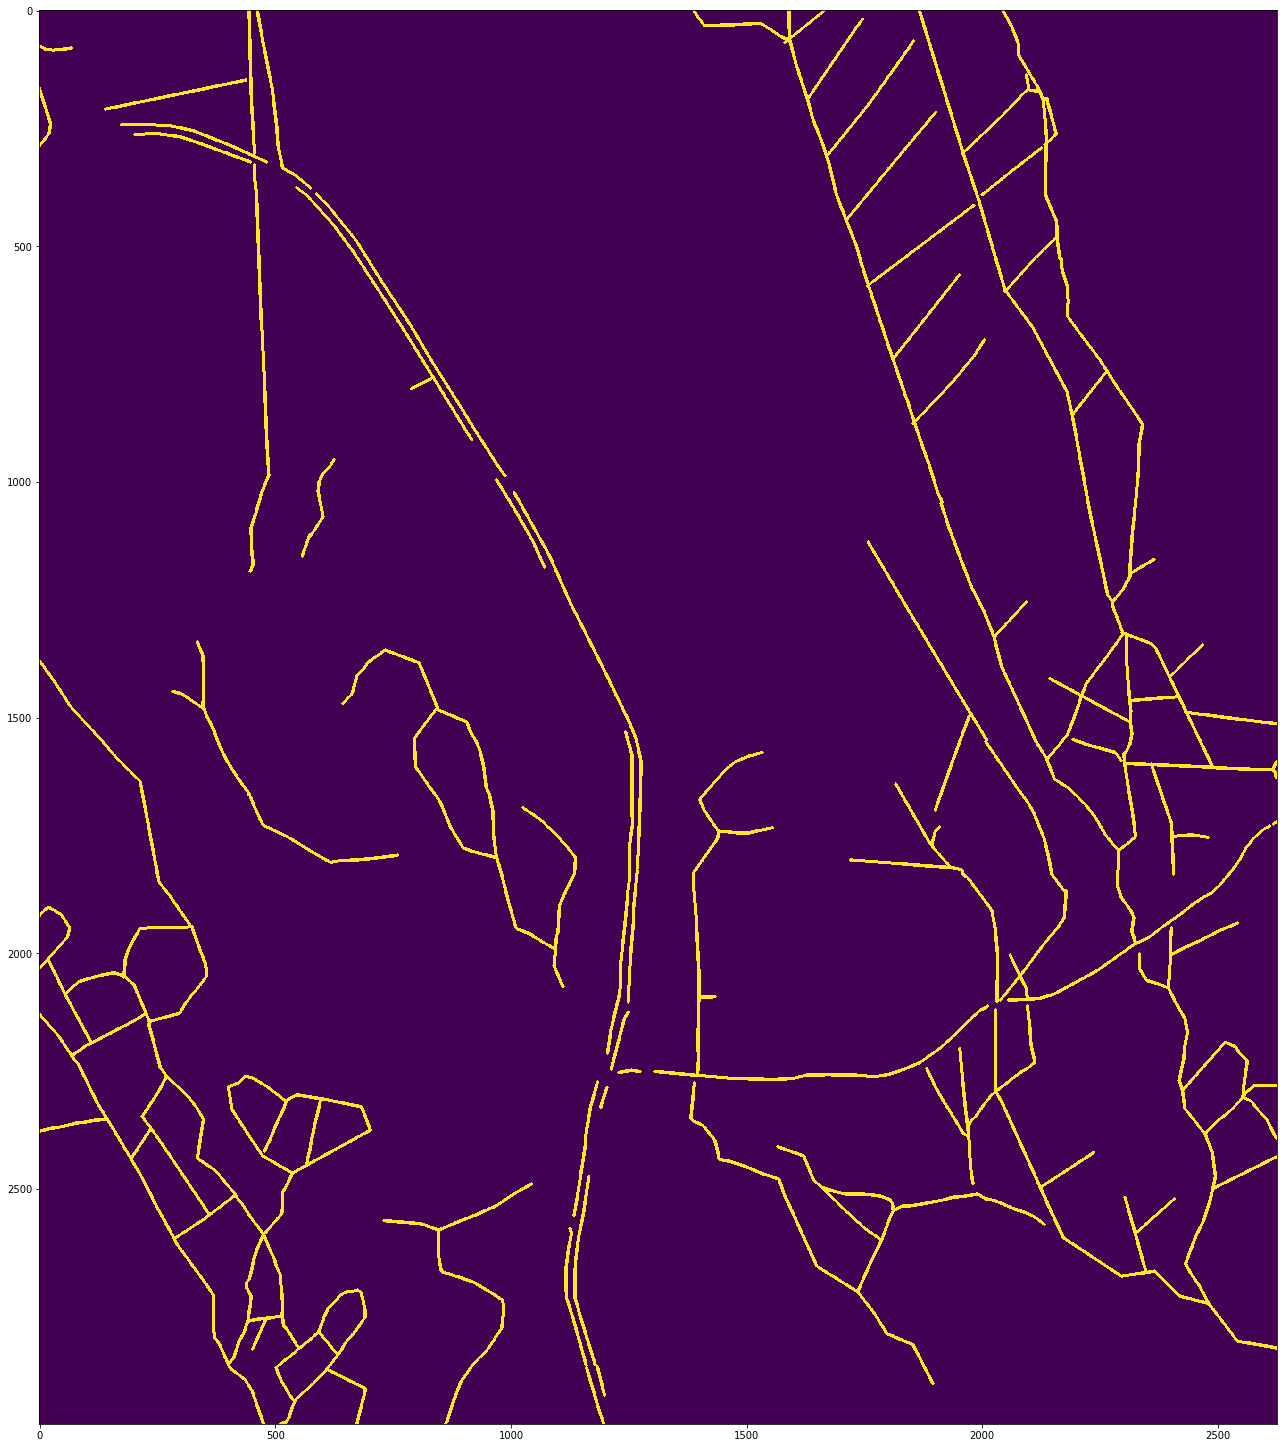

In [52]:
import scipy.ndimage.morphology as morph
plt.figure(num=None, figsize=(28,26), facecolor='w', edgecolor='k')
# This line is used to test with a buffer of the ditches Comment out if not buffer should be used

y = morph.binary_dilation(_y.reshape(2999, 2625),iterations = 3)
#evaluation = rasterToZones(y.copy(), 6)

plt.imshow(y)
y=y.reshape(-1)

In [100]:
def rasterToZones(arr, zoneSize):
    newArr = arr.copy()
    print(len(arr))
    print(len(arr[0]))
    for i in range(0, len(arr), zoneSize):
        for j in range(0, len(arr[i]), zoneSize):
            numberOfClassified = 0
            if i < len(arr) - zoneSize and j < len(arr[i]) - zoneSize:
                for k in range(zoneSize):
                    for l in range(zoneSize):
                        if arr[i + k][j + l] == 1:
                            numberOfClassified += 1
                if numberOfClassified > (zoneSize**2)/2:
                    for k in range(zoneSize):
                        for l in range(zoneSize):
                            newArr[i + k][j + l] = 1
                else:
                    for k in range(zoneSize):
                        for l in range(zoneSize):
                            newArr[i + k][j + l] = 0
    return newArr

In [53]:
#from sklearn.model_selection import train_test_split
#X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=0)
X_train = X[3937500:]
X_test = X[:3934875]
y_train = y[3937500:]
y_test = y[:3934875]

In [54]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3934875, 8)
(3934875, 8)
(3934875,)
(3934875,)


In [55]:
#xReshapeTrain = X_train.reshape(1499, 2625, 8)
#xReshapeTest = X_test.reshape(1499, 2625, 8)
yReshapeTrain = y_train.reshape(1499, 2625)
yReshapeTest = y_test.reshape(1499, 2625)

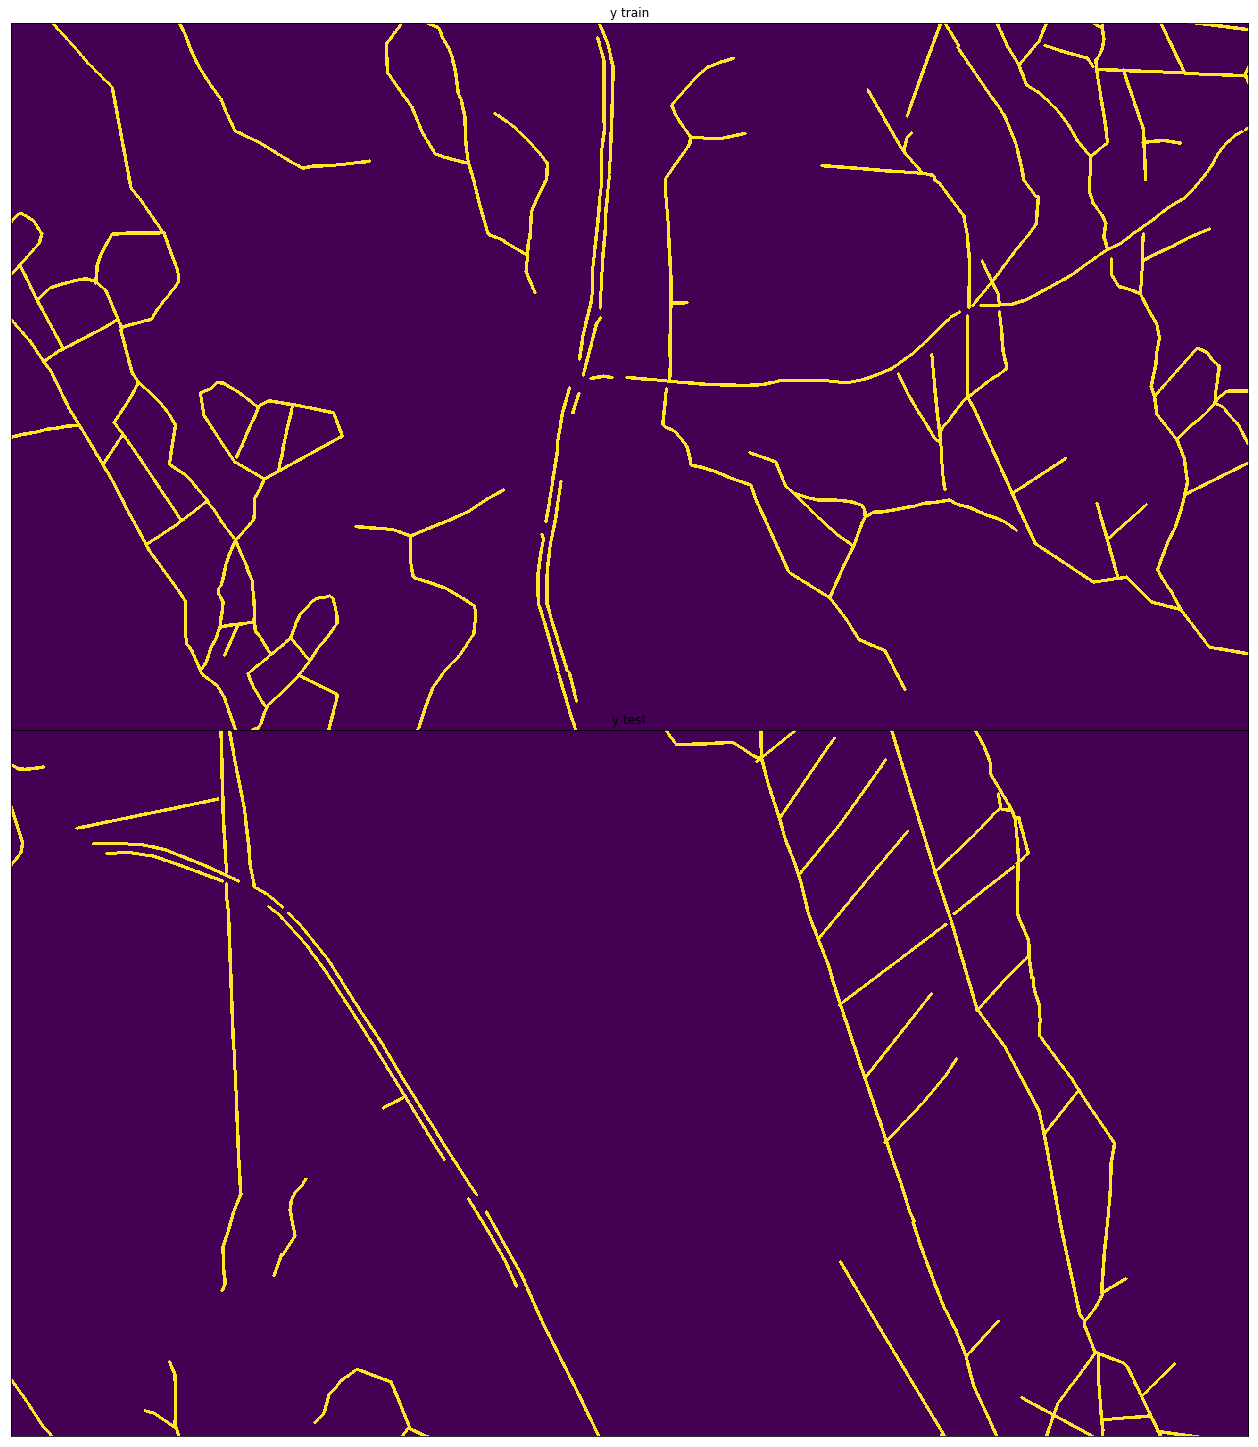

In [56]:
plt.figure(num=None, figsize=(28,26), facecolor='w', edgecolor='k')
ax = [plt.subplot(2,1,i+1) for i in range(2)]
for a in ax:
    a.set_xticklabels([])
    a.set_yticklabels([])
    a.tick_params(bottom=False, left=False)
plt.subplots_adjust(wspace=0,hspace=0)


#ax[0].title.set_text("x train")
#ax[0].imshow(xReshapeTrain[0])

#ax[1].title.set_text("x test")
#ax[1].imshow(xReshapeTest[0])

ax[0].title.set_text("y train")
ax[0].imshow(yReshapeTrain)

ax[1].title.set_text("y test")
ax[1].imshow(yReshapeTest)


In [57]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3934875, 8)
(3934875, 8)
(3934875,)
(3934875,)


In [58]:
clf = RandomForestClassifier(n_estimators=100)

clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [107]:
from joblib import dump, load
dump(clf, "RF_Classifier_zone3.joblib")

['RF_Classifier_zone3.joblib']

In [108]:
clfFile = load("RF_Classifier_zone3.joblib")

In [109]:
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix

y_pred = clfFile.predict(X_test)
print(len(X_test))
print(accuracy_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

3934875
0.9796240033037898
0.3588758007852862
[[3819966   18129]
 [  62048   34732]]


<BarContainer object of 8 artists>

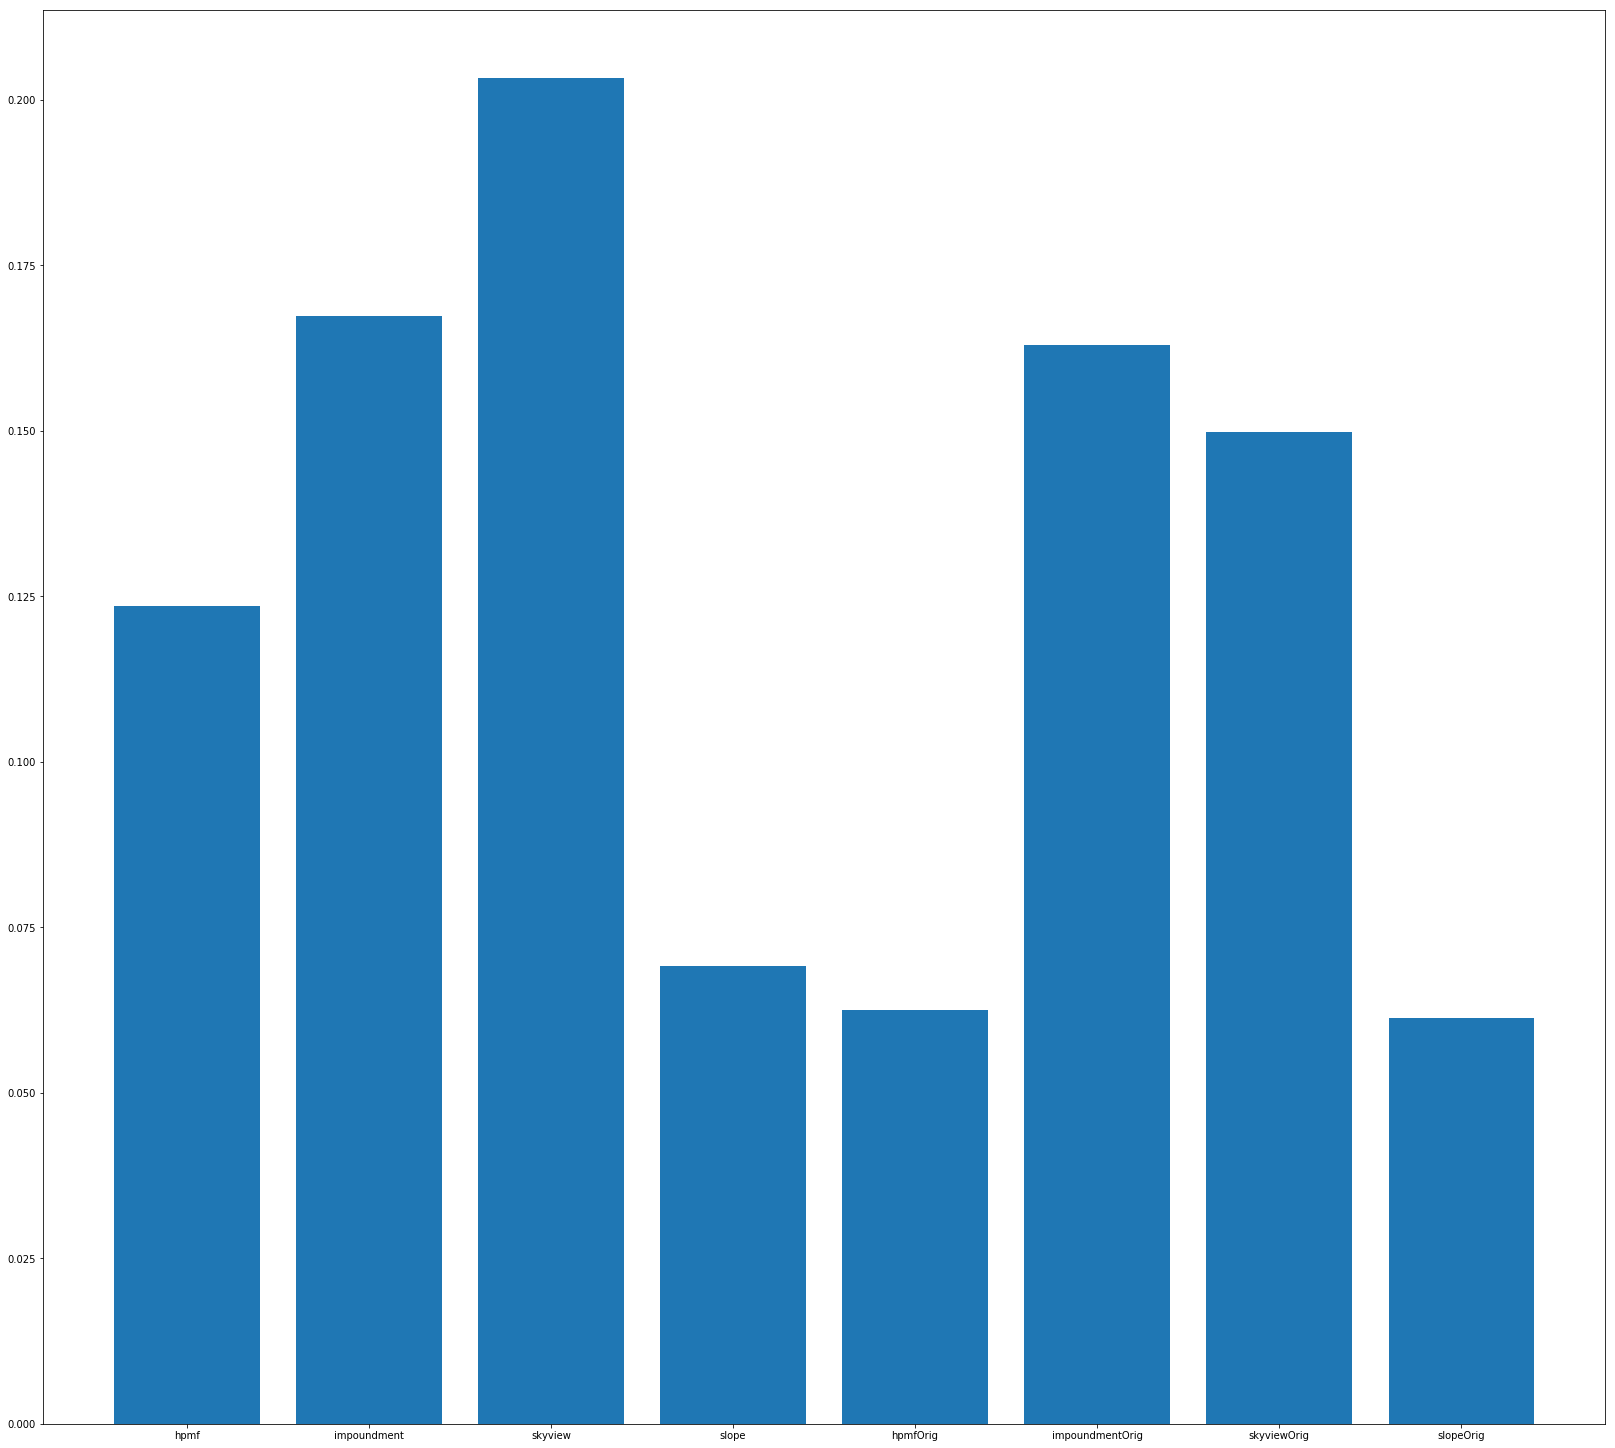

In [78]:
plt.figure(num=None, figsize=(28,26), facecolor='w', edgecolor='k')
plt.bar(["hpmf","impoundment","skyview","slope","hpmfOrig","impoundmentOrig","skyviewOrig","slopeOrig"],clf.feature_importances_)

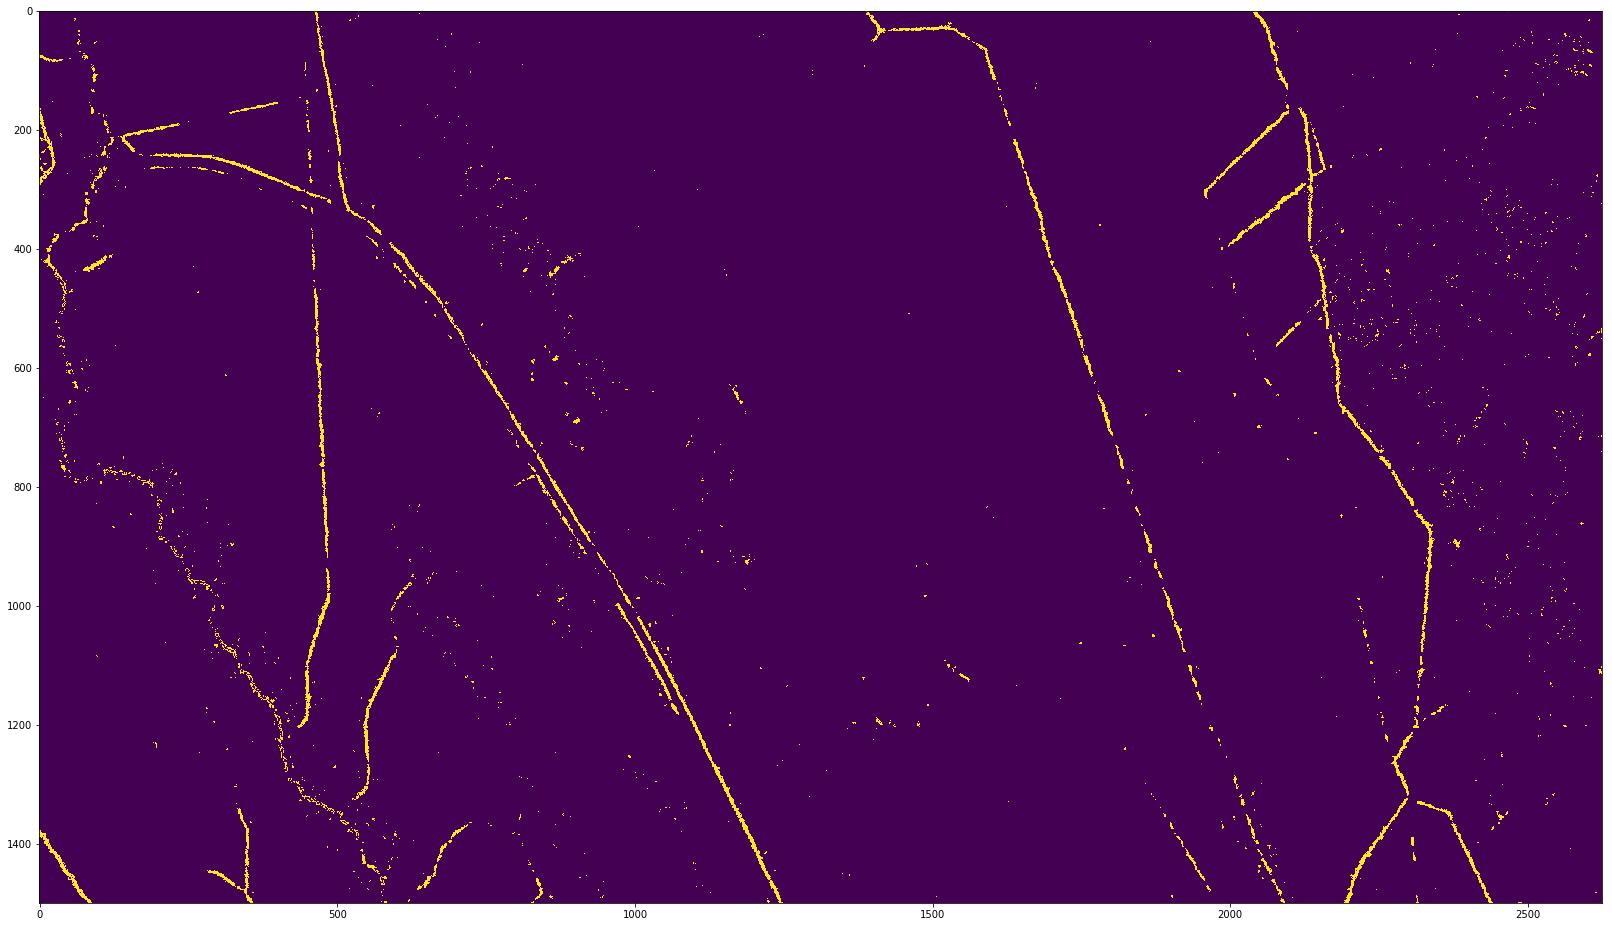

In [79]:
plt.figure(num=None, figsize=(28,26), facecolor='w', edgecolor='k')
predictionArr = y_pred.reshape(1499, 2625)
plt.imshow(predictionArr)

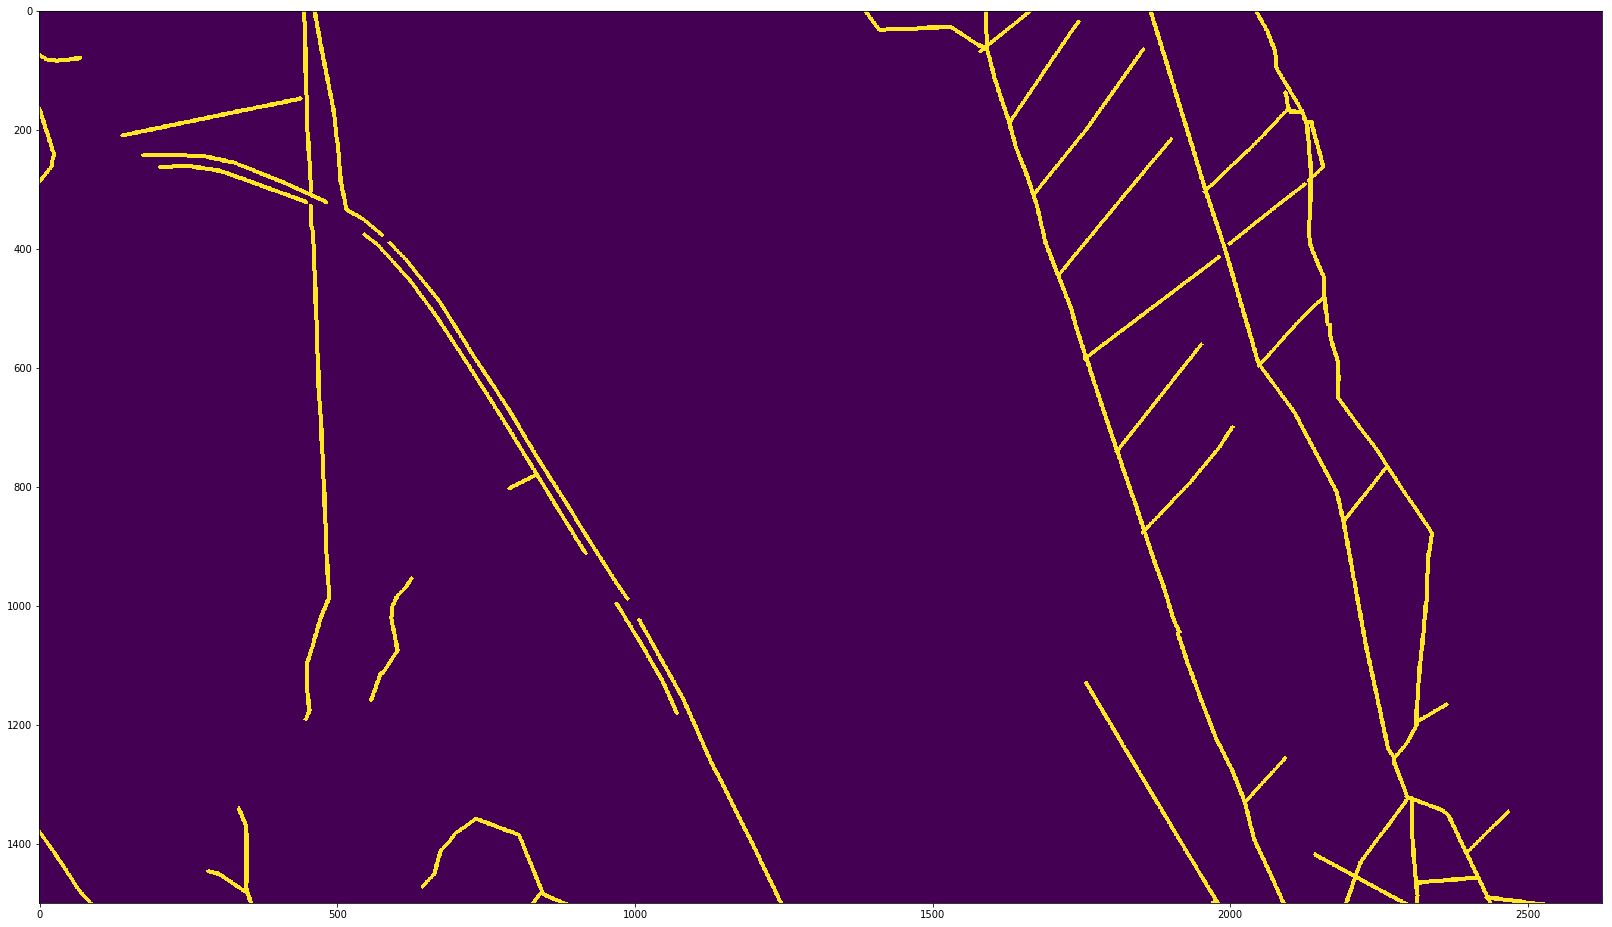

In [80]:
y_test_reshape = y_test.reshape(1499,2625)
plt.figure(num=None, figsize=(28,26), facecolor='w', edgecolor='k')
plt.imshow(y_test_reshape)

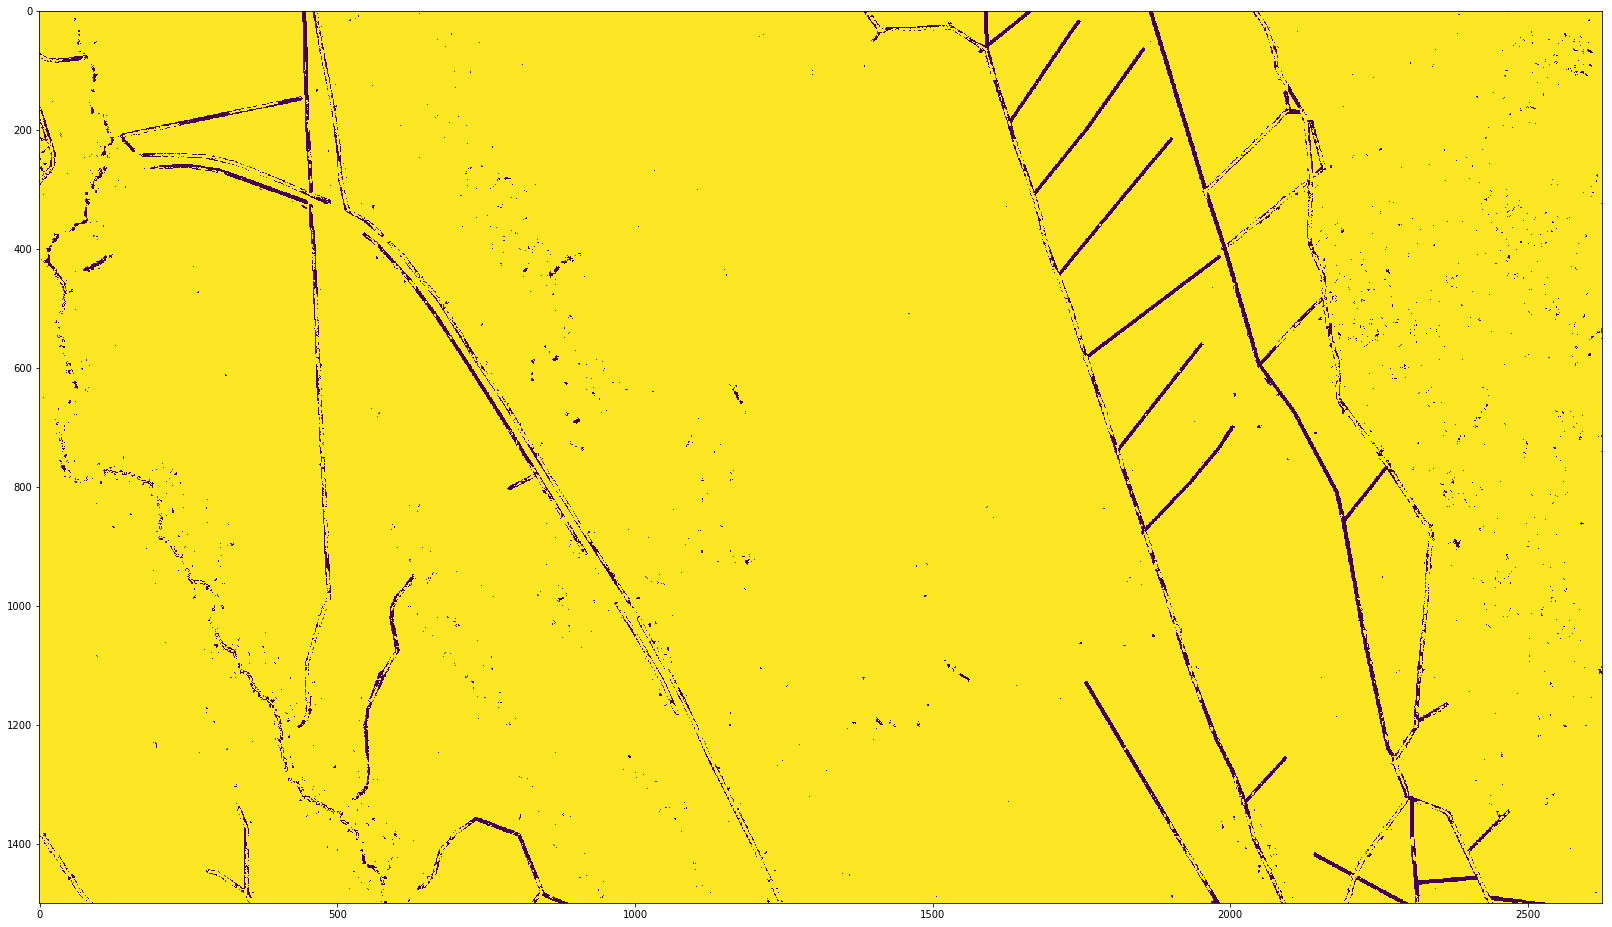

In [81]:
#evaluation = evaluation.reshape(-1)
#evaluation = evaluation[:125000]
#evaluation = evaluation.reshape(250, 500)
evaluatedArr = np.isclose(predictionArr, y_test_reshape)
plt.figure(num=None, figsize=(28,26), facecolor='w', edgecolor='k')
plt.imshow(evaluatedArr)

1499
2625


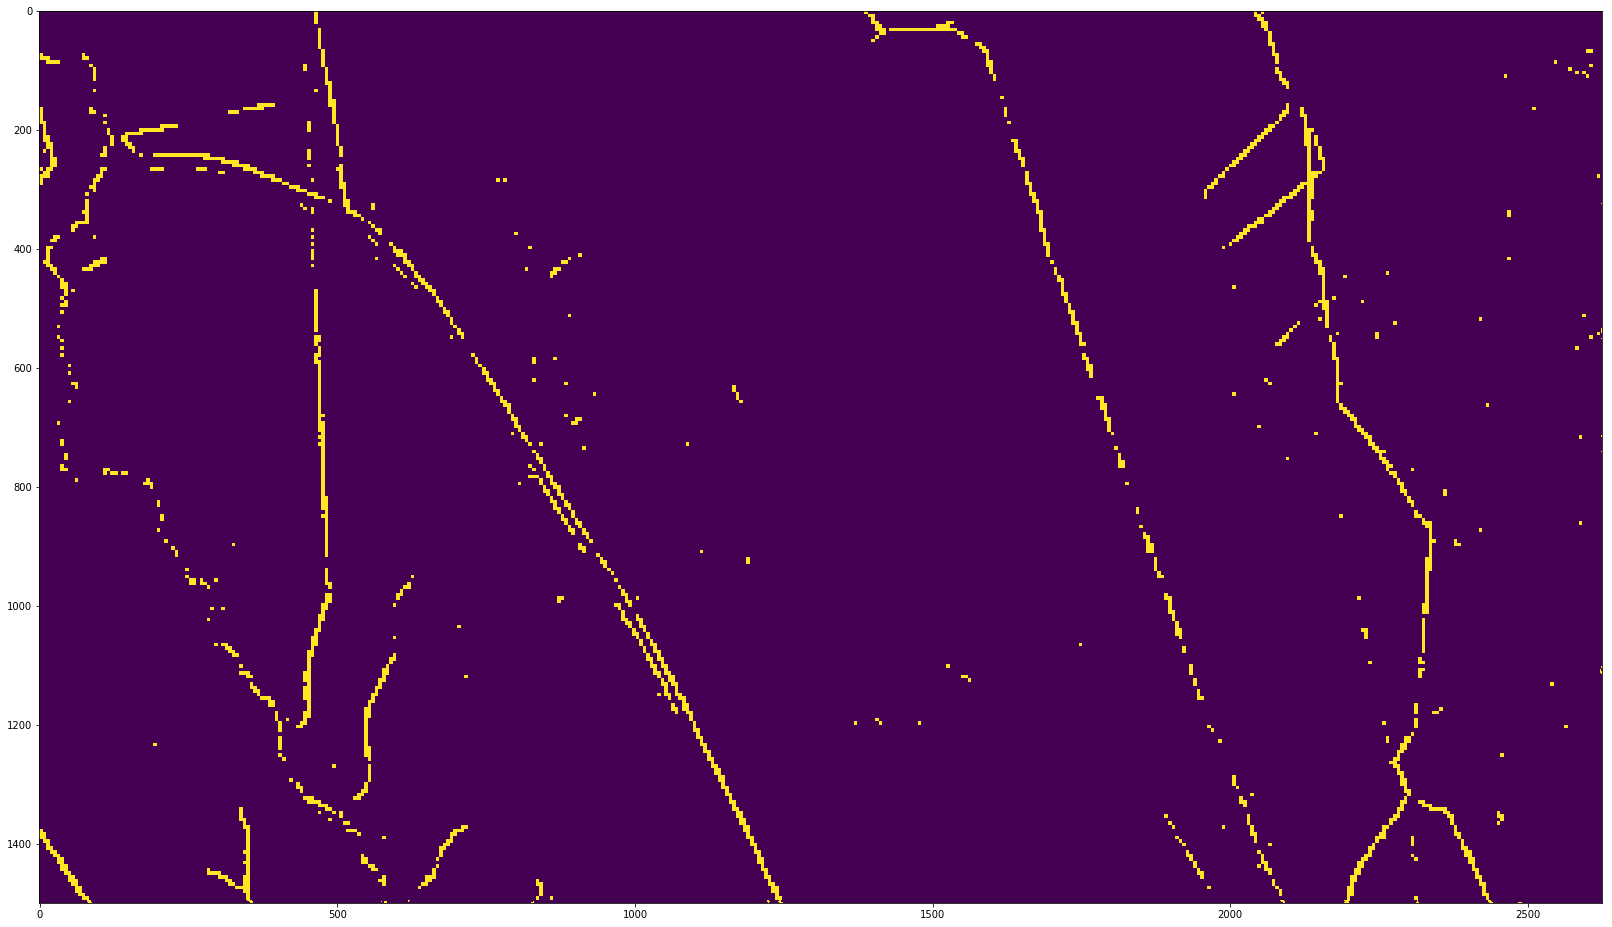

In [103]:
predictionZonesArr = rasterToZones(predictionArr, 6)
plt.figure(num=None, figsize=(28,26), facecolor='w', edgecolor='k')
plt.imshow(predictionZonesArr)

1499
2625


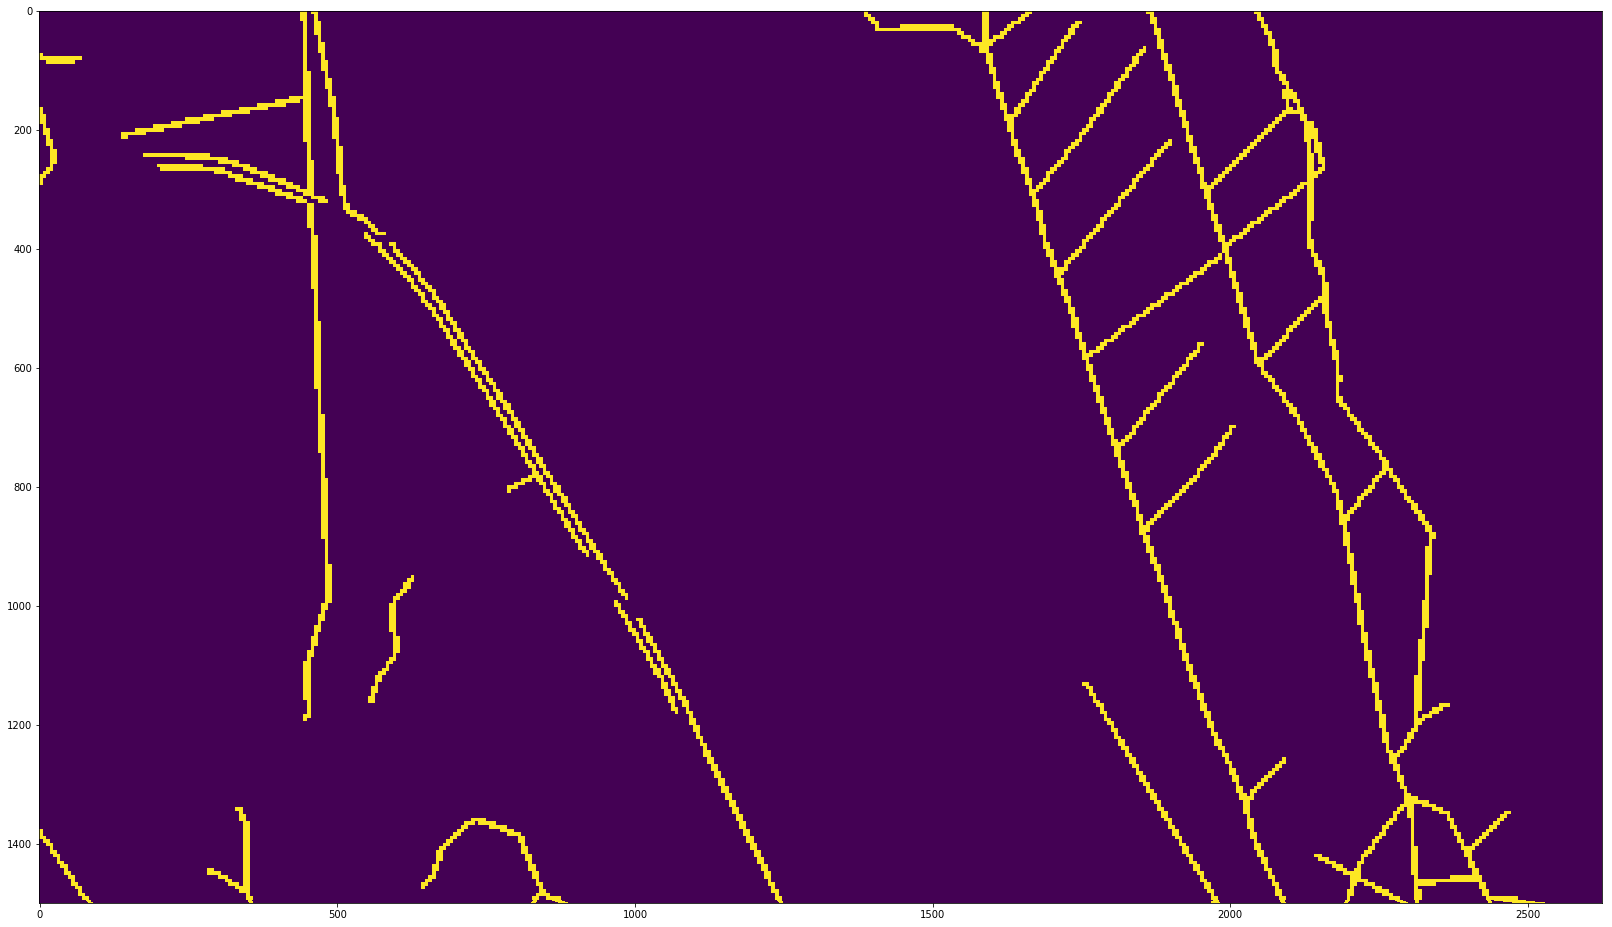

In [104]:
validationZones = rasterToZones(y_test_reshape, 6)
plt.figure(num=None, figsize=(28,26), facecolor='w', edgecolor='k')
plt.imshow(validationZones)

In [105]:
evaluatedPoints = 0
evaluatedZeroPoints = 0
correctPredictions = 0
correctZeroPredictions = 0
for i in range(len(validationZones)):
    for j in range(len(validationZones[i])):
        if validationZones[i][j] == 1:
            evaluatedPoints += 1
            if predictionZonesArr[i][j] == 1:
                correctPredictions += 1
        else:
            evaluatedZeroPoints += 1
            if predictionZonesArr[i][j] == 0:
                correctZeroPredictions += 1
            
print(correctPredictions/evaluatedPoints)
print(correctZeroPredictions/evaluatedZeroPoints)

0.41813453743443013
0.9952879323550313
